In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [60]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")

In [61]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [62]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [63]:
df.drop(['MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','NumWebVisitsMonth',
       'MntGoldProds', 'NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6


In [65]:
df.shape

(2240, 13)

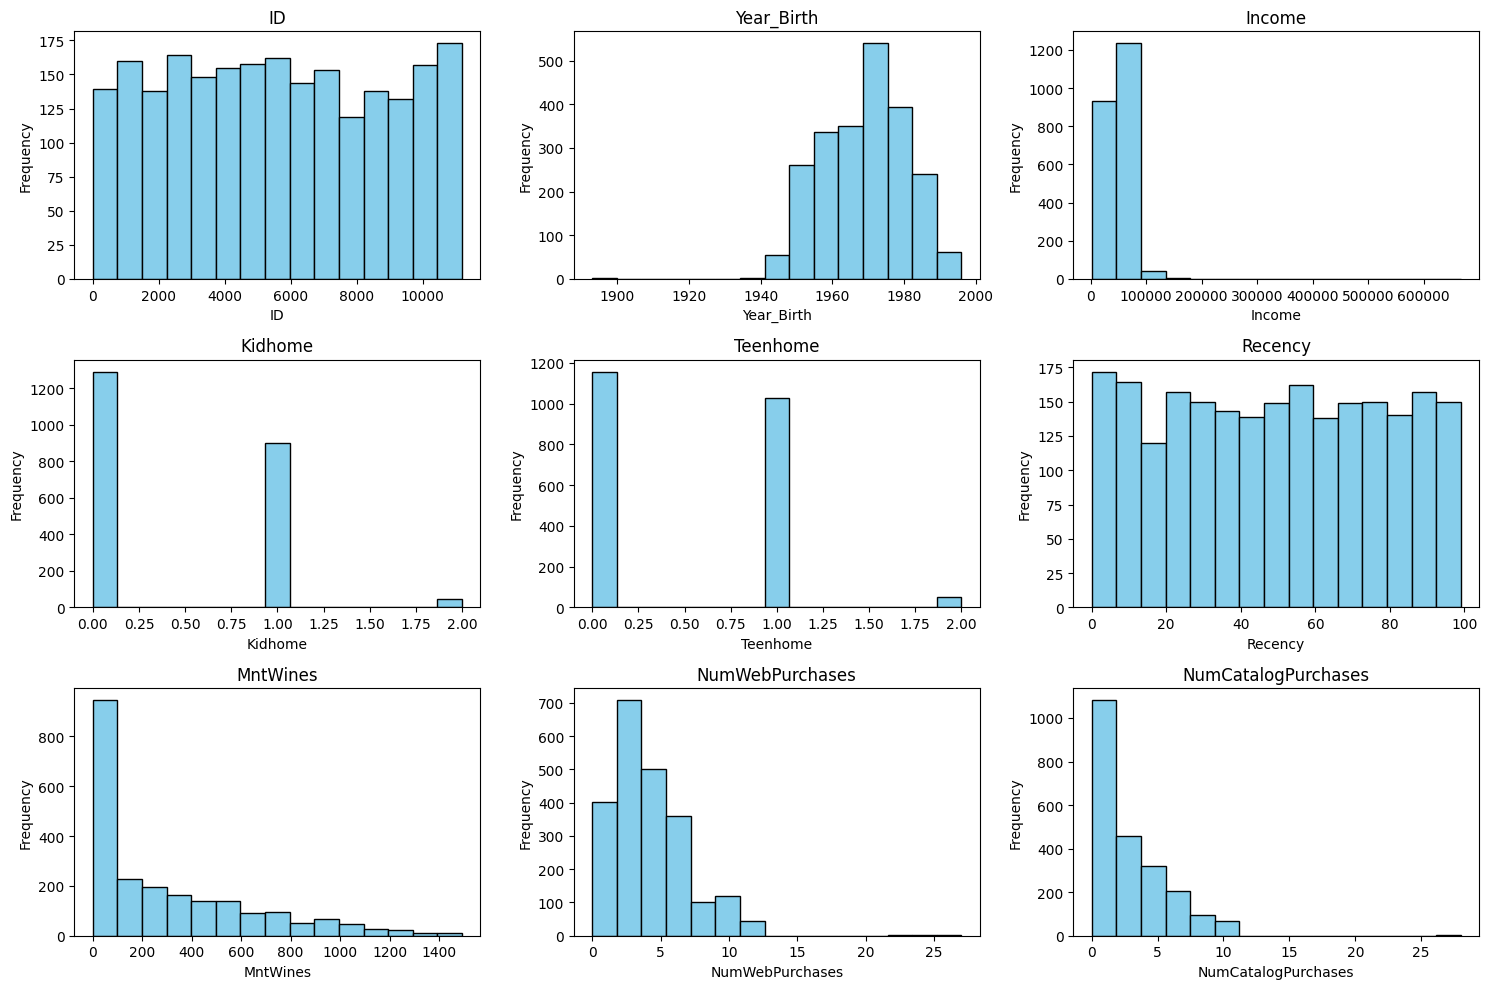

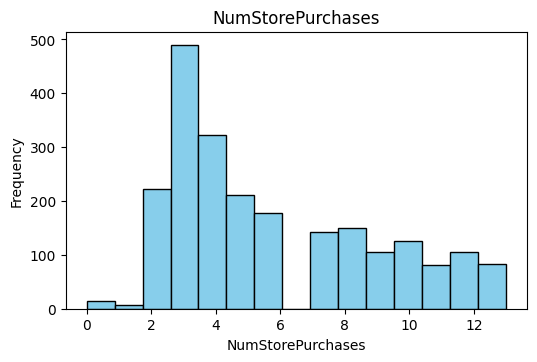

In [66]:
import matplotlib.pyplot as plt

# Definir el número de bins
num_bins = 15

# Seleccionar solo las columnas numéricas
X_num = df.select_dtypes(include=['int', 'float'])

# Dividir las columnas en grupos de 9 (o menos)
for i in range(0, len(X_num.columns), 9):
    plt.figure(figsize=(15, 10))
    for j, column in enumerate(X_num.columns[i:i+9]):
        plt.subplot(3, 3, j + 1)
        plt.hist(X_num[column], bins=num_bins, color='skyblue', edgecolor='black')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [67]:
# Eliminar las filas con un valor de "Income" igual a 666665.0
df = df[df['Income'] != 666665.0]


In [68]:
print("Después de la eliminación:")
print(df[df['Income'] == 666665.0])


Después de la eliminación:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, NumWebPurchases, NumCatalogPurchases, NumStorePurchases]
Index: []


## Convertimos el año de nacimiento a categorías de 25 años

In [69]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

## Convertimos la columna Year a bloques de 25 en 25

## Aquí tenéis dos formas, se crea una columna Year_cat

In [70]:
# convertir la columna "año" a tipo numérico
#df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')

# obtener el rango de años
min_year = df['Year_Birth'].min()
max_year = df['Year_Birth'].max()

# establecer los límites del rango de años para cada categoría
year_range = (max_year - min_year) / 3
cat1_max = min_year + year_range
cat2_max = min_year + year_range*2

# obtener los límites del rango de años de 25 años
year_range = 25
num_ranges = int(np.ceil((max_year - min_year) / year_range))
prop_range = np.linspace(min_year, min_year + year_range * num_ranges, num=num_ranges+1)

# reemplazar cada año con su rango de 25 años
df['Year_cat'] = pd.cut(df['Year_Birth'], bins=prop_range, labels=[f"{int(prop_range[i])}-{int(prop_range[i+1])-1}" for i in range(len(prop_range)-1)])

# imprimir los resultados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992


In [ ]:
# # Encuentra el año mínimo y máximo en la columna 'Year_Birth'
# min_year = df['Year_Birth'].min()
# max_year = df['Year_Birth'].max()

# # Calcula los intervalos
# intervalo_anios = 25
# num_intervalos = (max_year - min_year) // intervalo_anios + 1
# intervalos = [(min_year + i * intervalo_anios, min_year + (i+1) * intervalo_anios - 1) for i in range(num_intervalos)]

# # Define la función para asignar el intervalo de edad
# def asignar_intervalo_edad(year):
#     for inicio, fin in intervalos:
#         if inicio <= year <= fin:
#             return f"{inicio}-{fin}"
#     return "Fuera de rango"

# # Aplica la función a la columna 'Year_Birth' para crear la nueva columna 'Intervalo_Edad'
# df['Year_cat'] = df['Year_Birth'].apply(asignar_intervalo_edad)

# # Muestra el DataFrame resultante
# print(df.head())

In [71]:
# Contar el número de muestras de cada opción de 'Year_cat'
count_year_cat = df['Year_cat'].value_counts()

# Imprimir el resultado
print(count_year_cat)


Year_cat
1968-1992    1225
1943-1967     993
1993-2017      10
1918-1942       9
1893-1917       2
Name: count, dtype: int64


In [72]:
df.dtypes

ID                        int64
Year_Birth                int64
Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
Year_cat               category
dtype: object

In [73]:
# Eliminamos ID, Year_Birth, Dt_Customer

X = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [74]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,Graduation,Single,58138.0,0,0,58,635,8,10,4,1943-1967
1,Graduation,Single,46344.0,1,1,38,11,1,1,2,1943-1967
2,Graduation,Together,71613.0,0,0,26,426,8,2,10,1943-1967
3,Graduation,Together,26646.0,1,0,26,11,2,0,4,1968-1992
4,PhD,Married,58293.0,1,0,94,173,5,3,6,1968-1992


In [75]:
X.Year_cat = X.Year_cat.astype('object')

In [76]:
X.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Year_cat                object
dtype: object

In [77]:
# Verificar si existen valores nulos en el DataFrame
if X.isnull().values.any():
    print("Existen valores nulos en el dataset X.")
else:
    print("No existen valores nulos en el dataset X.")


Existen valores nulos en el dataset X.


In [78]:
# Identificar los índices de las filas con valores NaN
indices_filas_nan = X[X.isnull().any(axis=1)].index

# Eliminar las filas con valores NaN
X = X.dropna()

# Imprimir los índices de las filas con valores NaN
print("Índices de las filas con valores NaN:", indices_filas_nan)


Índices de las filas con valores NaN: Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,  239,
        312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084,
       2228],
      dtype='int64')


In [79]:
# Verificar si existen valores nulos en el DataFrame
if X.isnull().values.any():
    print("Existen valores nulos en el dataset X.")
else:
    print("No existen valores nulos en el dataset X.")


No existen valores nulos en el dataset X.


In [80]:
df.shape

(2240, 14)

In [81]:
X.shape

(2215, 11)

In [82]:
# DataFrame con columnas numéricas
X_num = df.select_dtypes(include=['int', 'float'])

# DataFrame con columnas de tipo objeto
X_cat = df.select_dtypes(include=['object'])

# Mostrar las primeras filas de cada DataFrame
print("DataFrame con columnas numéricas:")
print(X_num.head())

print("\nDataFrame con columnas de tipo objeto:")
print(X_cat.head())


DataFrame con columnas numéricas:
     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524        1957  58138.0        0         0       58       635   
1  2174        1954  46344.0        1         1       38        11   
2  4141        1965  71613.0        0         0       26       426   
3  6182        1984  26646.0        1         0       26        11   
4  5324        1981  58293.0        1         0       94       173   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                8                   10                  4  
1                1                    1                  2  
2                8                    2                 10  
3                2                    0                  4  
4                5                    3                  6  

DataFrame con columnas de tipo objeto:
    Education Marital_Status Dt_Customer
0  Graduation         Single  04-09-2012
1  Graduation         Single  08-03-2014
2  Graduation   

In [83]:
X_num.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,58138.0,0,0,58,635,8,10,4
1,2174,1954,46344.0,1,1,38,11,1,1,2
2,4141,1965,71613.0,0,0,26,426,8,2,10
3,6182,1984,26646.0,1,0,26,11,2,0,4
4,5324,1981,58293.0,1,0,94,173,5,3,6


In [84]:
X_cat.head()

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


## Fin limpieza --> Encoding y Escalado

In [85]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
le = LabelEncoder()

# Copiar el DataFrame X_cat para mantener el original intacto
X_cat2 = X_cat.copy()

# Iterar sobre cada columna en X_cat y codificarla
for column in X_cat.columns:
    X_cat2[column] = le.fit_transform(X_cat[column])

# Mostrar las primeras filas del DataFrame X_cat2
print(X_cat2.head())


   Education  Marital_Status  Dt_Customer
0          2               4           80
1          2               4          157
2          2               5          444
3          2               5          199
4          4               3          390


In [86]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Estandarizar los datos numéricos
X_scaled = scaler.fit_transform(X_num)

# Convertir el array estandarizado de nuevo a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)

# Mostrar las primeras filas del DataFrame X_scaled
print(X_scaled.head())


         ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.020999   -0.985345  0.234063 -0.825218 -0.929894  0.307039  0.983781   
1 -1.053058   -1.235733 -0.234559  1.032559  0.906934 -0.383664 -0.870479   
2 -0.447070   -0.317643  0.769478 -0.825218 -0.929894 -0.798086  0.362723   
3  0.181716    1.268149 -1.017239  1.032559 -0.929894 -0.798086 -0.870479   
4 -0.082614    1.017761  0.240221  1.032559 -0.929894  1.550305 -0.389085   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0         1.409304             2.510890          -0.550785  
1        -1.110409            -0.568720          -1.166125  
2         1.409304            -0.226541           1.295237  
3        -0.750450            -0.910898          -0.550785  
4         0.329427             0.115638           0.064556  


In [87]:
X_scaled

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,-0.020999,-0.985345,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.409304,2.510890,-0.550785
1,-1.053058,-1.235733,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-1.110409,-0.568720,-1.166125
2,-0.447070,-0.317643,0.769478,-0.825218,-0.929894,-0.798086,0.362723,1.409304,-0.226541,1.295237
3,0.181716,1.268149,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.750450,-0.910898,-0.550785
4,-0.082614,1.017761,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.329427,0.115638,0.064556
...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,0.356642,-0.825218,0.906934,-0.107383,1.203678,1.769263,0.115638,-0.550785
2236,-0.490200,-1.903435,0.467539,2.890335,0.906934,0.237969,0.303291,1.409304,-0.226541,-0.243114
2237,0.516905,1.017761,0.188091,-0.825218,-0.929894,1.446700,1.795020,-0.750450,0.115638,2.218248
2238,0.814199,-1.068807,0.675388,-0.825218,0.906934,-1.419719,0.368666,0.689386,0.799996,1.295237


In [88]:
X_scaled2 = pd.DataFrame(data= X_scaled, columns = X_num.columns)

In [89]:
# resetear los índices de ambos DataFrames
X_scaled2 = X_scaled2.reset_index(drop=True)
X_cat2 = X_cat2.reset_index(drop=True)

In [90]:
# Unir los datos codificados y estandarizados
X_both = pd.concat([X_cat2, X_scaled], axis=1)

# Crear un nuevo DataFrame con las columnas ordenadas
X_final = pd.DataFrame(X_both, columns=X_cat2.columns.tolist() + X_scaled.columns.tolist())

# Mostrar las primeras filas del DataFrame X_final
print(X_final.head())


   Education  Marital_Status  Dt_Customer        ID  Year_Birth    Income  \
0          2               4           80 -0.020999   -0.985345  0.234063   
1          2               4          157 -1.053058   -1.235733 -0.234559   
2          2               5          444 -0.447070   -0.317643  0.769478   
3          2               5          199  0.181716    1.268149 -1.017239   
4          4               3          390 -0.082614    1.017761  0.240221   

    Kidhome  Teenhome   Recency  MntWines  NumWebPurchases  \
0 -0.825218 -0.929894  0.307039  0.983781         1.409304   
1  1.032559  0.906934 -0.383664 -0.870479        -1.110409   
2 -0.825218 -0.929894 -0.798086  0.362723         1.409304   
3  1.032559 -0.929894 -0.798086 -0.870479        -0.750450   
4  1.032559 -0.929894  1.550305 -0.389085         0.329427   

   NumCatalogPurchases  NumStorePurchases  
0             2.510890          -0.550785  
1            -0.568720          -1.166125  
2            -0.226541          

In [91]:
X_final.head()

,Education,Marital_Status,Dt_Customer,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,2,4,80,-0.020999,-0.985345,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.409304,2.510890,-0.550785
1,2,4,157,-1.053058,-1.235733,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-1.110409,-0.568720,-1.166125
2,2,5,444,-0.447070,-0.317643,0.769478,-0.825218,-0.929894,-0.798086,0.362723,1.409304,-0.226541,1.295237
3,2,5,199,0.181716,1.268149,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.750450,-0.910898,-0.550785
4,4,3,390,-0.082614,1.017761,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.329427,0.115638,0.064556


In [92]:


# Verificar si existen valores nulos en el DataFrame X_final
null_values = X_final.isnull().sum()

# Imprimir los valores nulos encontrados
print("Valores nulos en X_final:\n", null_values)


Valores nulos en X_final:
 Education               0
Marital_Status          0
Dt_Customer             0
ID                      0
Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
dtype: int64


In [94]:
# Eliminar filas con valores nulos
X_final = X_final.dropna()

# Verificar si aún quedan valores nulos en el DataFrame X_final
print("Valores nulos en X_final después de la eliminación:\n", X_final.isnull().sum())


Valores nulos en X_final después de la eliminación:
 Education              0
Marital_Status         0
Dt_Customer            0
ID                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64


In [95]:
X_final.loc[X_final.isnull().any(axis=1)]

,Education,Marital_Status,Dt_Customer,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases


In [97]:
X_final.head()

,Education,Marital_Status,Dt_Customer,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,2,4,80,-0.020999,-0.985345,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.409304,2.510890,-0.550785
1,2,4,157,-1.053058,-1.235733,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-1.110409,-0.568720,-1.166125
2,2,5,444,-0.447070,-0.317643,0.769478,-0.825218,-0.929894,-0.798086,0.362723,1.409304,-0.226541,1.295237
3,2,5,199,0.181716,1.268149,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.750450,-0.910898,-0.550785
4,4,3,390,-0.082614,1.017761,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.329427,0.115638,0.064556


# Ya tenemos una matriz categórica y numérica ready para entrenar

## Gaussian Mixture

## Creamos el método de distancia de Gower para calcular bien distancias de datos numéricos y categóricos.

In [96]:
def gower_distance(x, y):
    # Inicializar la distancia
    distance = 0

    # Calcular la distancia de Manhattan para variables numéricas
    for i in range(len(x)):
        if np.issubdtype(type(x[i]), np.number) and np.issubdtype(type(y[i]), np.number):
            distance += abs(x[i] - y[i])
        elif x[i] != y[i]:  # Calcular la distancia de Hamming para variables categóricas
            distance += 1

    return distance

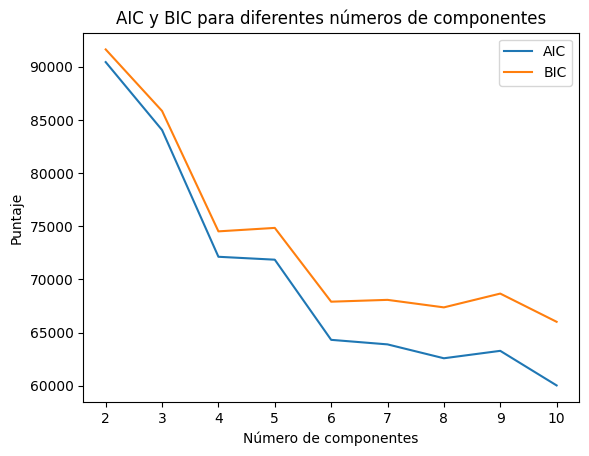

In [98]:
from sklearn.mixture import GaussianMixture

# Verificar si hay suficientes muestras para ajustar el modelo GMM
if len(X_final) < 2:
    print("No hay suficientes muestras en el DataFrame para ajustar el modelo GMM.")
else:
    # Definir el rango de número de componentes (clusters)
    n_clusters = range(2, 11)

    # Inicializar listas para almacenar los resultados de AIC y BIC
    aic_scores = []
    bic_scores = []

    # Iterar sobre diferentes valores de k
    for n in n_clusters:
        # Inicializar y ajustar el modelo GMM
        gm = GaussianMixture(n_components=n, random_state=42)
        gm.fit(X_final)

        # Calcular AIC y BIC
        aic_scores.append(gm.aic(X_final))
        bic_scores.append(gm.bic(X_final))

    # Trazar los resultados de AIC y BIC
    import matplotlib.pyplot as plt

    plt.plot(n_clusters, aic_scores, label='AIC')
    plt.plot(n_clusters, bic_scores, label='BIC')
    plt.xlabel('Número de componentes')
    plt.ylabel('Puntaje')
    plt.title('AIC y BIC para diferentes números de componentes')
    plt.legend()
    plt.show()


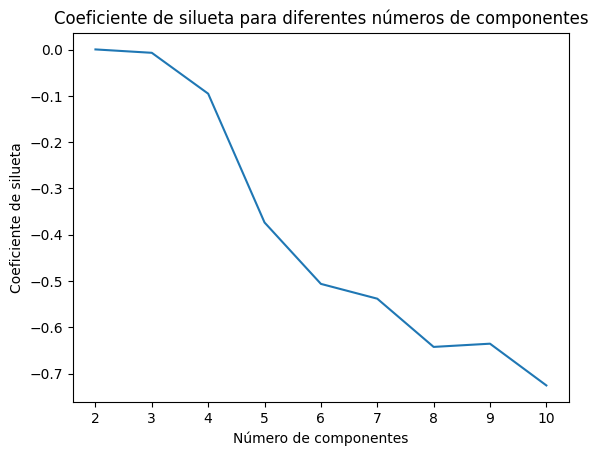

In [99]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Inicializar una lista para almacenar los puntajes de silueta
silhouette_scores = []

# Iterar sobre diferentes valores de k
for n in n_clusters:
    # Inicializar y ajustar el modelo GMM
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(X_final)

    # Obtener las etiquetas de cluster asignadas por el modelo GMM
    labels = gm.predict(X_final)

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X_final, labels)
    silhouette_scores.append(silhouette_avg)

# Trazar el coeficiente de silueta para diferentes números de componentes
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Número de componentes')
plt.ylabel('Coeficiente de silueta')
plt.title('Coeficiente de silueta para diferentes números de componentes')
plt.show()


In [101]:
from sklearn.mixture import GaussianMixture

# Definir el número óptimo de clusters (proporciona el número óptimo de clusters aquí)
n_clusters_optimo = 4

# Ajustar el modelo Gaussian Mixture con el número óptimo de clusters
gm = GaussianMixture(n_components=n_clusters_optimo, random_state=42)
gm.fit(X_final)

# Predecir las etiquetas de cluster para los datos
labels = gm.predict(X_final)


In [102]:
# crear un dataframe con las etiquetas de cluster
clusters_df = pd.DataFrame(labels, columns=['Cluster'])

# restablecer los índices de los dataframes
df = df.reset_index(drop=True)
clusters_df = clusters_df.reset_index(drop=True)

# Concatenar los DataFrames df y clusters_df a lo largo de las columnas
df_con_clusters = pd.concat([df, clusters_df], axis=1)

# Mostrar las primeras filas del DataFrame df_con_clusters
print(df_con_clusters.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  NumWebPurchases  NumCatalogPurchases  \
0  04-09-2012       58       635                8                   10   
1  08-03-2014       38        11                1                    1   
2  21-08-2013       26       426                8                    2   
3  10-02-2014       26        11                2                    0   
4  19-01-2014       94       173                5                    3   

   NumStorePurchases   Year_cat  Cluster  
0                  4  1943-1967      3.0  


In [104]:
df_con_clusters.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,3.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,2.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,3.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,2.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,1.0


In [105]:
df_con_clusters['Cluster'].value_counts()

Cluster
3.0    1274
2.0     649
1.0     279
0.0      14
Name: count, dtype: int64

In [106]:
import plotly.express as px

# Crear el gráfico de dispersión
fig = px.scatter(df_con_clusters, x='Education', y='Income', color='Cluster',
                 title='Gráfico 2D de Educación vs. Ingreso con color de cluster')

# Mostrar el gráfico
fig.show()


In [108]:
import plotly.express as px

# Crear el gráfico de dispersión 3D
fig = px.scatter_3d(df_con_clusters, x='Education', y='Income', z='Kidhome', color='Cluster',
                    title='Gráfico 3D de Educación, Ingreso y Kidhome con color de cluster')

# Mostrar el gráfico
fig.show()


In [109]:
import plotly.express as px

# Crear el gráfico de dispersión 3D
fig = px.scatter_3d(df_con_clusters, x='MntWines', y='Income', z='Kidhome', color='Cluster',
                    title='Gráfico 3D de Gasto en Vinos, Ingreso y Kidhome con color de cluster')

# Mostrar el gráfico
fig.show()


In [111]:
# Crear un diccionario para mapear el estado civil a números únicos
marital_status_mapping = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6, 'Absurd': 7}

# Mapear las categorías de estado civil a números únicos
df_con_clusters['Marital_Status_Num'] = df_con_clusters['Marital_Status'].map(marital_status_mapping)

# Crear el gráfico de dispersión 3D
fig = px.scatter_3d(df_con_clusters, x='MntWines', y='Marital_Status_Num', z='Kidhome', color='Cluster',
                    title='Gráfico 3D de Gasto en Vinos, Estado Civil y Kidhome con color de cluster')

# Cambiar los nombres de los ticks del eje y a las categorías originales de estado civil
fig.update_layout(scene=dict(yaxis=dict(tickmode='array', tickvals=list(marital_status_mapping.values()),
                                    ticktext=list(marital_status_mapping.keys()))))

# Mostrar el gráfico
fig.show()


In [112]:
# Crear un diccionario para mapear la categoría de año a números únicos
year_cat_mapping = {'1950-1974': 1, '1975-1999': 2, '2000-2024': 3}

# Mapear las categorías de año a números únicos
df_con_clusters['Year_cat_Num'] = df_con_clusters['Year_cat'].map(year_cat_mapping)

# Crear el gráfico de dispersión 3D
fig = px.scatter_3d(df_con_clusters, x='MntWines', y='Marital_Status', z='Year_cat_Num', color='Cluster',
                    title='Gráfico 3D de Gasto en Vinos, Estado Civil y Categoría de Año con color de cluster')

# Cambiar los nombres de los ticks del eje z a las categorías originales de la categoría de año
fig.update_layout(scene=dict(zaxis=dict(tickmode='array', tickvals=list(year_cat_mapping.values()),
                                        ticktext=list(year_cat_mapping.keys()))))

# Mostrar el gráfico
fig.show()


## K-PROTOTYPES

In [107]:
!pip install kmodes

In [110]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [115]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Definir la lista de objetos kprototypes y las listas para almacenar costos y coeficientes de silueta
kprototypes_list = []
costs = []
silhouette_scores = []

# Iterar sobre diferentes valores de k
for k in range(2, 8):
    # Inicializar y ajustar el modelo KPrototypes
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=0, random_state=42)
    clusters = kproto.fit_predict(X_final, categorical=list(range(len(X_cat2.columns))))

    # Calcular y almacenar el costo
    costs.append(kproto.cost_)

    # Calcular y almacenar el coeficiente de silueta
    silhouette = silhouette_score(X_final, clusters, metric=gower_distance)
    silhouette_scores.append(silhouette)

    # Añadir el objeto kprototypes a la lista
    kprototypes_list.append(kproto)


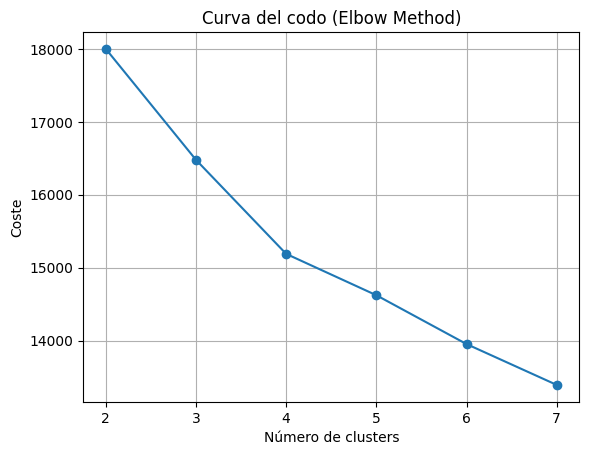

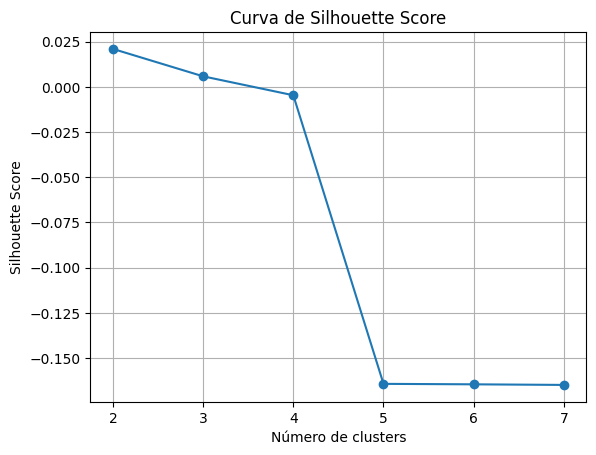

In [116]:
import matplotlib.pyplot as plt

# Plotear la curva del codo (elbow method)
plt.plot(range(2, 8), costs, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coste')
plt.title('Curva del codo (Elbow Method)')
plt.grid(True)
plt.show()

# Plotear la curva de silhouette score
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Curva de Silhouette Score')
plt.grid(True)
plt.show()


In [117]:
# Elegir el número óptimo de clusters según la curva del codo
numero_optimo_clusters = 5

# Inicializar y ajustar el modelo KPrototypes final con el número óptimo de clusters
kproto_final = KPrototypes(n_clusters=numero_optimo_clusters, init='Cao', verbose=0)
clusters_final = kproto_final.fit_predict(X_final, categorical=list(range(len(X_cat2.columns))))


In [118]:
print(kproto.cluster_centroids_)

[[ 2.03275587e-02  8.65898837e-01 -8.86347033e-01  8.51228841e-01
  -9.29894379e-01 -2.92811591e-02 -7.89759992e-01 -6.10576741e-01
  -7.25630373e-01 -7.91594882e-01  2.00000000e+00  3.00000000e+00
   4.62000000e+02]
 [-9.94942396e-02  9.04616149e-01  8.83593679e-01 -5.89724864e-01
  -9.29894379e-01  3.11226957e-02  9.99674988e-01  4.00404644e-01
   9.02408566e-01  9.25816012e-01  2.00000000e+00  3.00000000e+00
   3.10000000e+01]
 [-1.49697158e-02 -3.01503595e-01 -4.26734144e-01  1.18138616e+00
   9.77971587e-01  1.95005663e-02 -7.07125125e-01 -6.17205821e-01
  -6.78368097e-01 -7.19068549e-01  2.00000000e+00  3.00000000e+00
   6.20000000e+01]
 [ 1.18296803e+00  6.83910097e-01  2.44132823e+01  1.03255877e+00
  -9.29894379e-01 -9.01691756e-01 -8.76422624e-01 -3.90491285e-01
  -5.68719619e-01 -8.58455096e-01  2.00000000e+00  5.00000000e+00
   3.20000000e+01]
 [-4.97903895e-02 -6.42312863e-01 -3.04641024e-01 -8.19025062e-01
   4.72217969e-01 -9.41802920e-03 -5.64724563e-01 -3.84491967e-01


In [119]:
clusters_final = pd.DataFrame(clusters_final)
df_proto = pd.concat([df, clusters_final], axis =1)
df_proto = df_proto.rename(columns = {0:"Cluster"})
df_proto.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,2.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,4.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,4.0


In [120]:
df_proto['Cluster'].value_counts()

Cluster
4.0    546
2.0    513
3.0    490
0.0    362
1.0    305
Name: count, dtype: int64

In [123]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Llenar la diagonal de la matriz de distancia con ceros
np.fill_diagonal(X_final, 0)

# Calcular los coeficientes de silueta para cada punto de datos
silhouette_vals = silhouette_samples(X_final, clusters_final, metric='precomputed')

# Plotear el gráfico de Silhouette
y_lower, y_upper = 0, 0
for i in range(kproto_final.n_clusters):
    # Obtener los coeficientes de silueta para los puntos en el cluster i
    cluster_silhouette_vals = silhouette_vals[clusters_final == i]
    cluster_silhouette_vals.sort()

    # Calcular los límites inferior y superior para el gráfico
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

# Configurar la apariencia del gráfico
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Etiqueta del Cluster")
plt.title("Gráfico de Silueta para K-Means Clustering")
plt.show()


AttributeError: 'DataFrame' object has no attribute 'flat'

In [124]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_proto, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

## DBSCAN

In [125]:
from sklearn.cluster import DBSCAN

In [126]:
from sklearn.neighbors import NearestNeighbors
# Encontrar las distancias k
k = 8
neighbors = NearestNeighbors() #le pasamos la distancia de Gower que hemos creado
neighbors_fit = neighbors.fit(X_final)
distances, _ = neighbors_fit.kneighbors(X_final)

In [127]:
import numpy as np

# Encontrar las distancias k
k = 8
neighbors = NearestNeighbors()
neighbors_fit = neighbors.fit(X_final)
distances, _ = neighbors_fit.kneighbors(X_final)

# Ordenar las distancias
sorted_distances = np.sort(distances, axis=0)

# Imprimir las distancias ordenadas
print("Distancias ordenadas:\n", sorted_distances)


Distancias ordenadas:
 [[0.00000000e+00 9.24232237e-04 1.16145185e-01 1.27224851e+00
  2.35960685e+00]
 [0.00000000e+00 9.24232237e-04 1.38634836e-01 1.59522484e+00
  2.49417928e+00]
 [0.00000000e+00 2.46461930e-03 1.38634836e-01 1.91589865e+00
  2.55580753e+00]
 ...
 [0.00000000e+00 9.12217953e+00 9.39431011e+00 9.42808155e+00
  9.64314128e+00]
 [0.00000000e+00 9.22014527e+00 9.39907279e+00 9.54657993e+00
  9.77356356e+00]
 [0.00000000e+00 2.36177346e+01 2.38215427e+01 2.38565993e+01
  2.38762173e+01]]


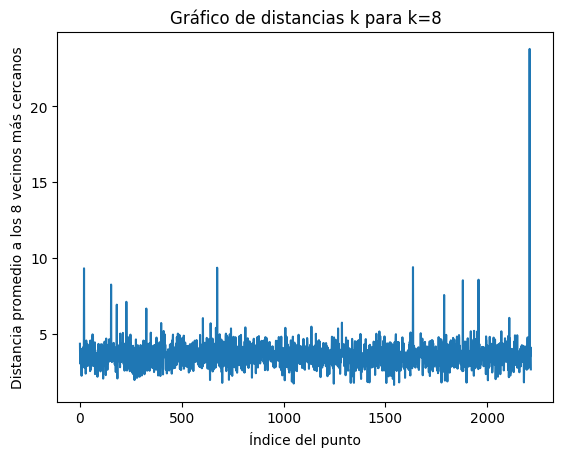

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la distancia promedio a los k vecinos más cercanos para cada punto
distances_mean = np.mean(distances[:, 1:k+1], axis=1)

# Graficar las distancias k
plt.plot(distances_mean)
plt.xlabel('Índice del punto')
plt.ylabel(f'Distancia promedio a los {k} vecinos más cercanos')
plt.title(f'Gráfico de distancias k para k={k}')
plt.show()


In [130]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Definir el espacio de búsqueda para eps y min_samples
eps_values = np.arange(1, 8, 0.2) # rango e incremento
min_samples_values = np.arange(3, 10, 1) # rango e incremento

# Inicializar las variables para almacenar los mejores resultados
best_score = -1
best_params = None

# Realizar la búsqueda en malla (grid search)
for eps in eps_values:
    for min_samples in min_samples_values:
        # Crear y ajustar el modelo DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_final)

        # Ignorar resultados con solo un cluster o clusters asignados como ruido
        if len(np.unique(clusters)) > 1 and np.any(clusters == -1):
            # Calcular el coeficiente de silueta
            score = silhouette_score(X_final, clusters)

            # Actualizar los mejores parámetros si se encuentra un nuevo mejor valor
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Imprimir los mejores valores de eps y min_samples
print(f"Mejores parámetros: {best_params}, Mejor coeficiente de silueta: {best_score}")


Mejores parámetros: {'eps': 4.6, 'min_samples': 4}, Mejor coeficiente de silueta: 0.4748720097843363


In [131]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan2 = DBSCAN(eps=4.6, min_samples=4)
clusters2 = dbscan2.fit_predict(X_final)


In [132]:
cl3=pd.DataFrame(dbscan2.labels_,columns=['Cluster'])

In [133]:
cl3.value_counts()

Cluster
 1         1056
 0          573
 2          516
-1           71
Name: count, dtype: int64

In [134]:
df_DB = pd.concat([df,cl3],axis=1)

In [135]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_DB, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()